In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nk
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [12]:
data = pd.read_csv('../data/raw_analyst_ratings.csv')
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


#### Statistics for headline length


In [13]:
data['headline-length'] = data['headline'].apply(len)
data.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline-length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


In [14]:
data['headline-length'].describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline-length, dtype: float64

#### Number of articles per publisher

In [15]:
publisher_counts = data['publisher'].value_counts()
publisher_counts

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

In [16]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['day_of_week'] = data['date'].dt.day_name()
date_analysis = data['day_of_week'].value_counts()
date_analysis

day_of_week
Thursday     12688
Wednesday    11891
Tuesday      11002
Monday       10322
Friday        9381
Sunday         436
Saturday       267
Name: count, dtype: int64

#### Sentiment analysis on Headlines

In [17]:
nk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [19]:
data['sentiment'] = data['headline'].apply(get_sentiment)

In [20]:
print(data[['headline', 'sentiment']].head())

                                            headline sentiment
0            Stocks That Hit 52-Week Highs On Friday   Neutral
1         Stocks That Hit 52-Week Highs On Wednesday   Neutral
2                      71 Biggest Movers From Friday   Neutral
3       46 Stocks Moving In Friday's Mid-Day Session   Neutral
4  B of A Securities Maintains Neutral on Agilent...   Neutral


#### Identify common keywords

#### Time Series Analysis

C:\Users\pc\AppData\Local\Temp\ipykernel_6008\1130828826.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = data.resample('M').size()


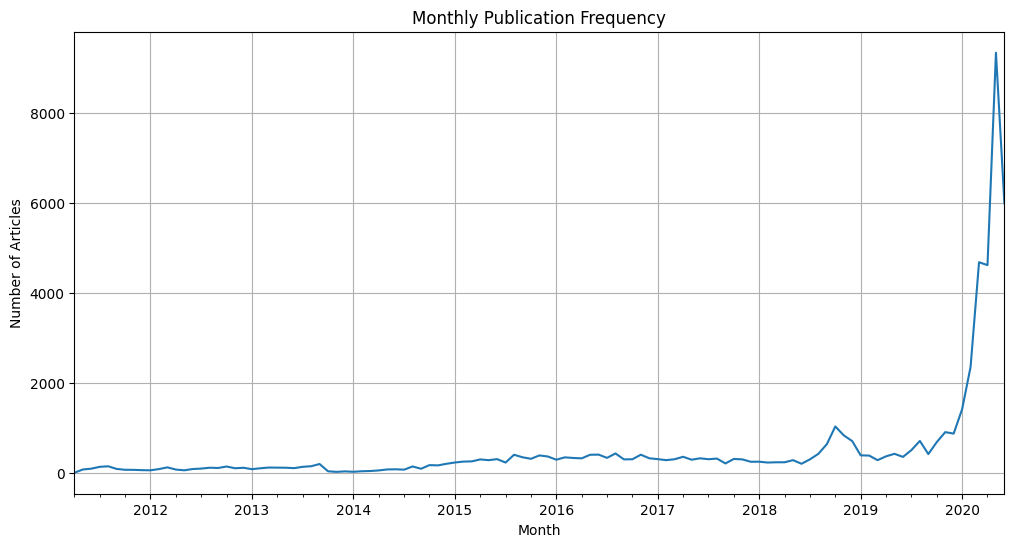

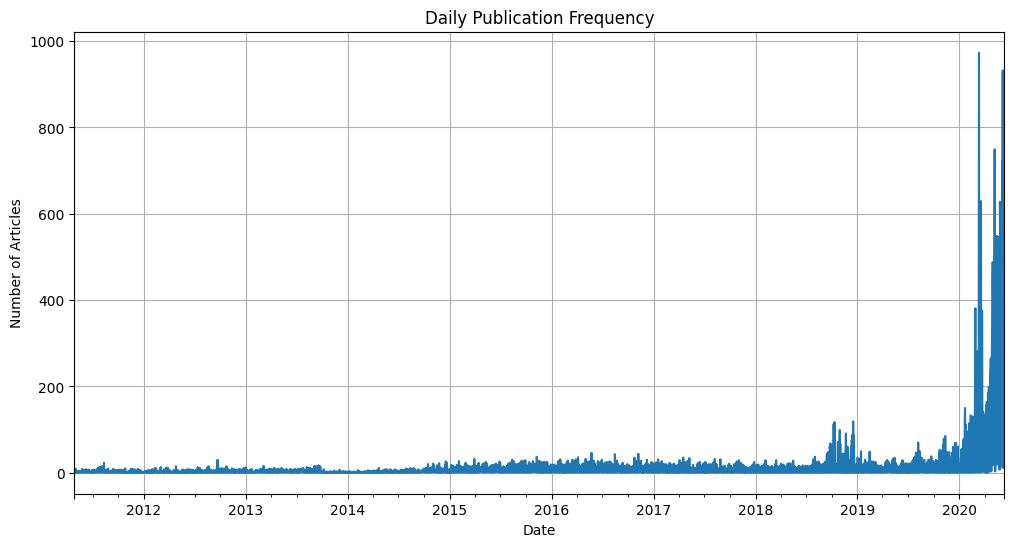

In [23]:
data.dropna(subset=['date'], inplace=True)
data.set_index('date', inplace=True)
monthly_counts = data.resample('M').size()
daily_counts = data.resample('D').size()

# Plot monthly publication counts
plt.figure(figsize=(12, 6))
monthly_counts.plot(title='Monthly Publication Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

# Plot daily publication counts
plt.figure(figsize=(12, 6))
daily_counts.plot(title='Daily Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()